In [1]:
!pip install pandas matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv("/content/GlobalWeatherRepository.csv")

In [4]:
print(df.head())
print(df.info())
print(df.describe())

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone              

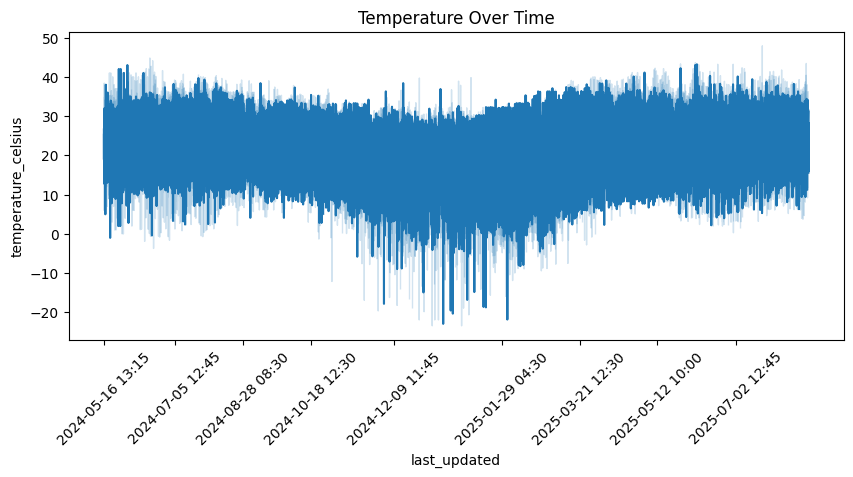

In [8]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='last_updated', y='temperature_celsius')
plt.title("Temperature Over Time")

# Show every nth date to avoid overlap
n = 10000  # show every 1000th date
plt.xticks(df['last_updated'][::n], rotation=45)

plt.show()

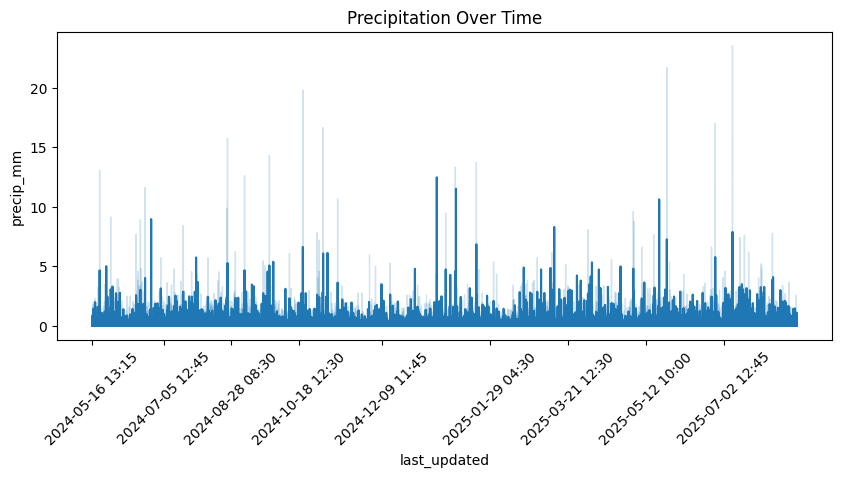

In [9]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='last_updated', y='precip_mm')
plt.title("Precipitation Over Time")

# Show every nth date to avoid overlap
n = 10000  # show every 1000th date
plt.xticks(df['last_updated'][::n], rotation=45)

plt.show()

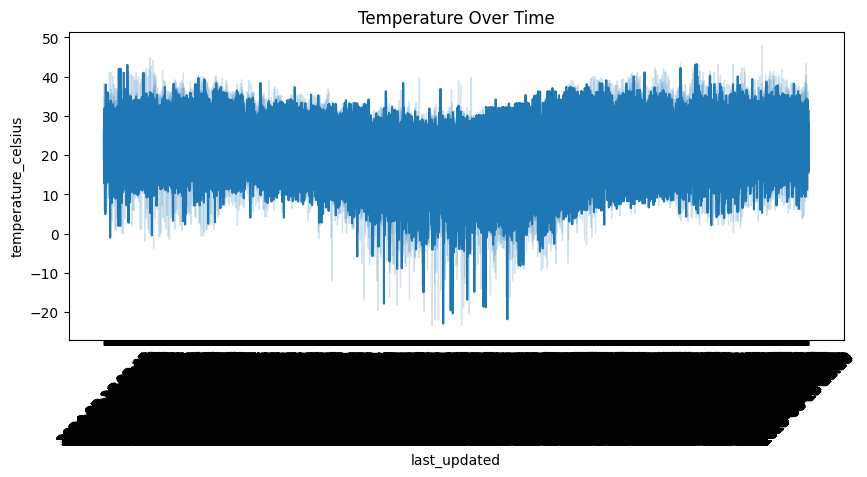

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='last_updated', y='precip_mm')
plt.title("Precipitation Over Time")
plt.xticks(rotation=45)
plt.show()

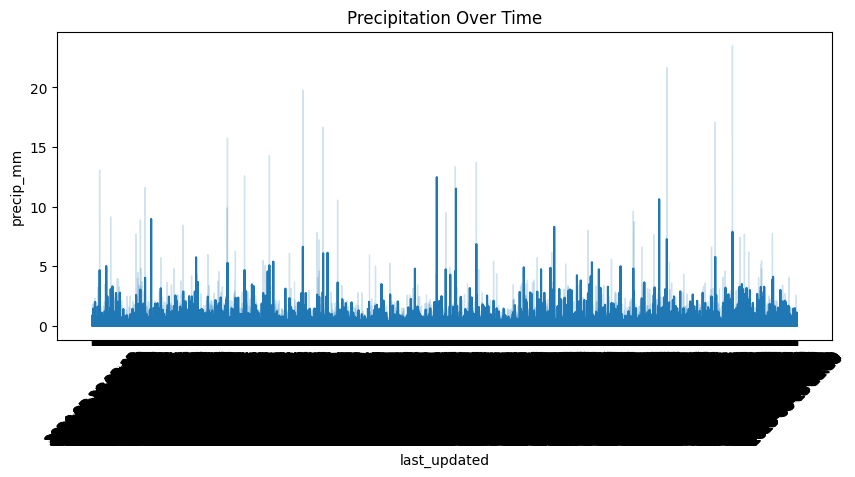

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='last_updated', y='precip_mm')
plt.title("Precipitation Over Time")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Confusion Matrix
numeric_df = df.select_dtypes(include=['number']).drop(columns=['last_updated_epoch'])
correlation_matrix = numeric_df.corr()

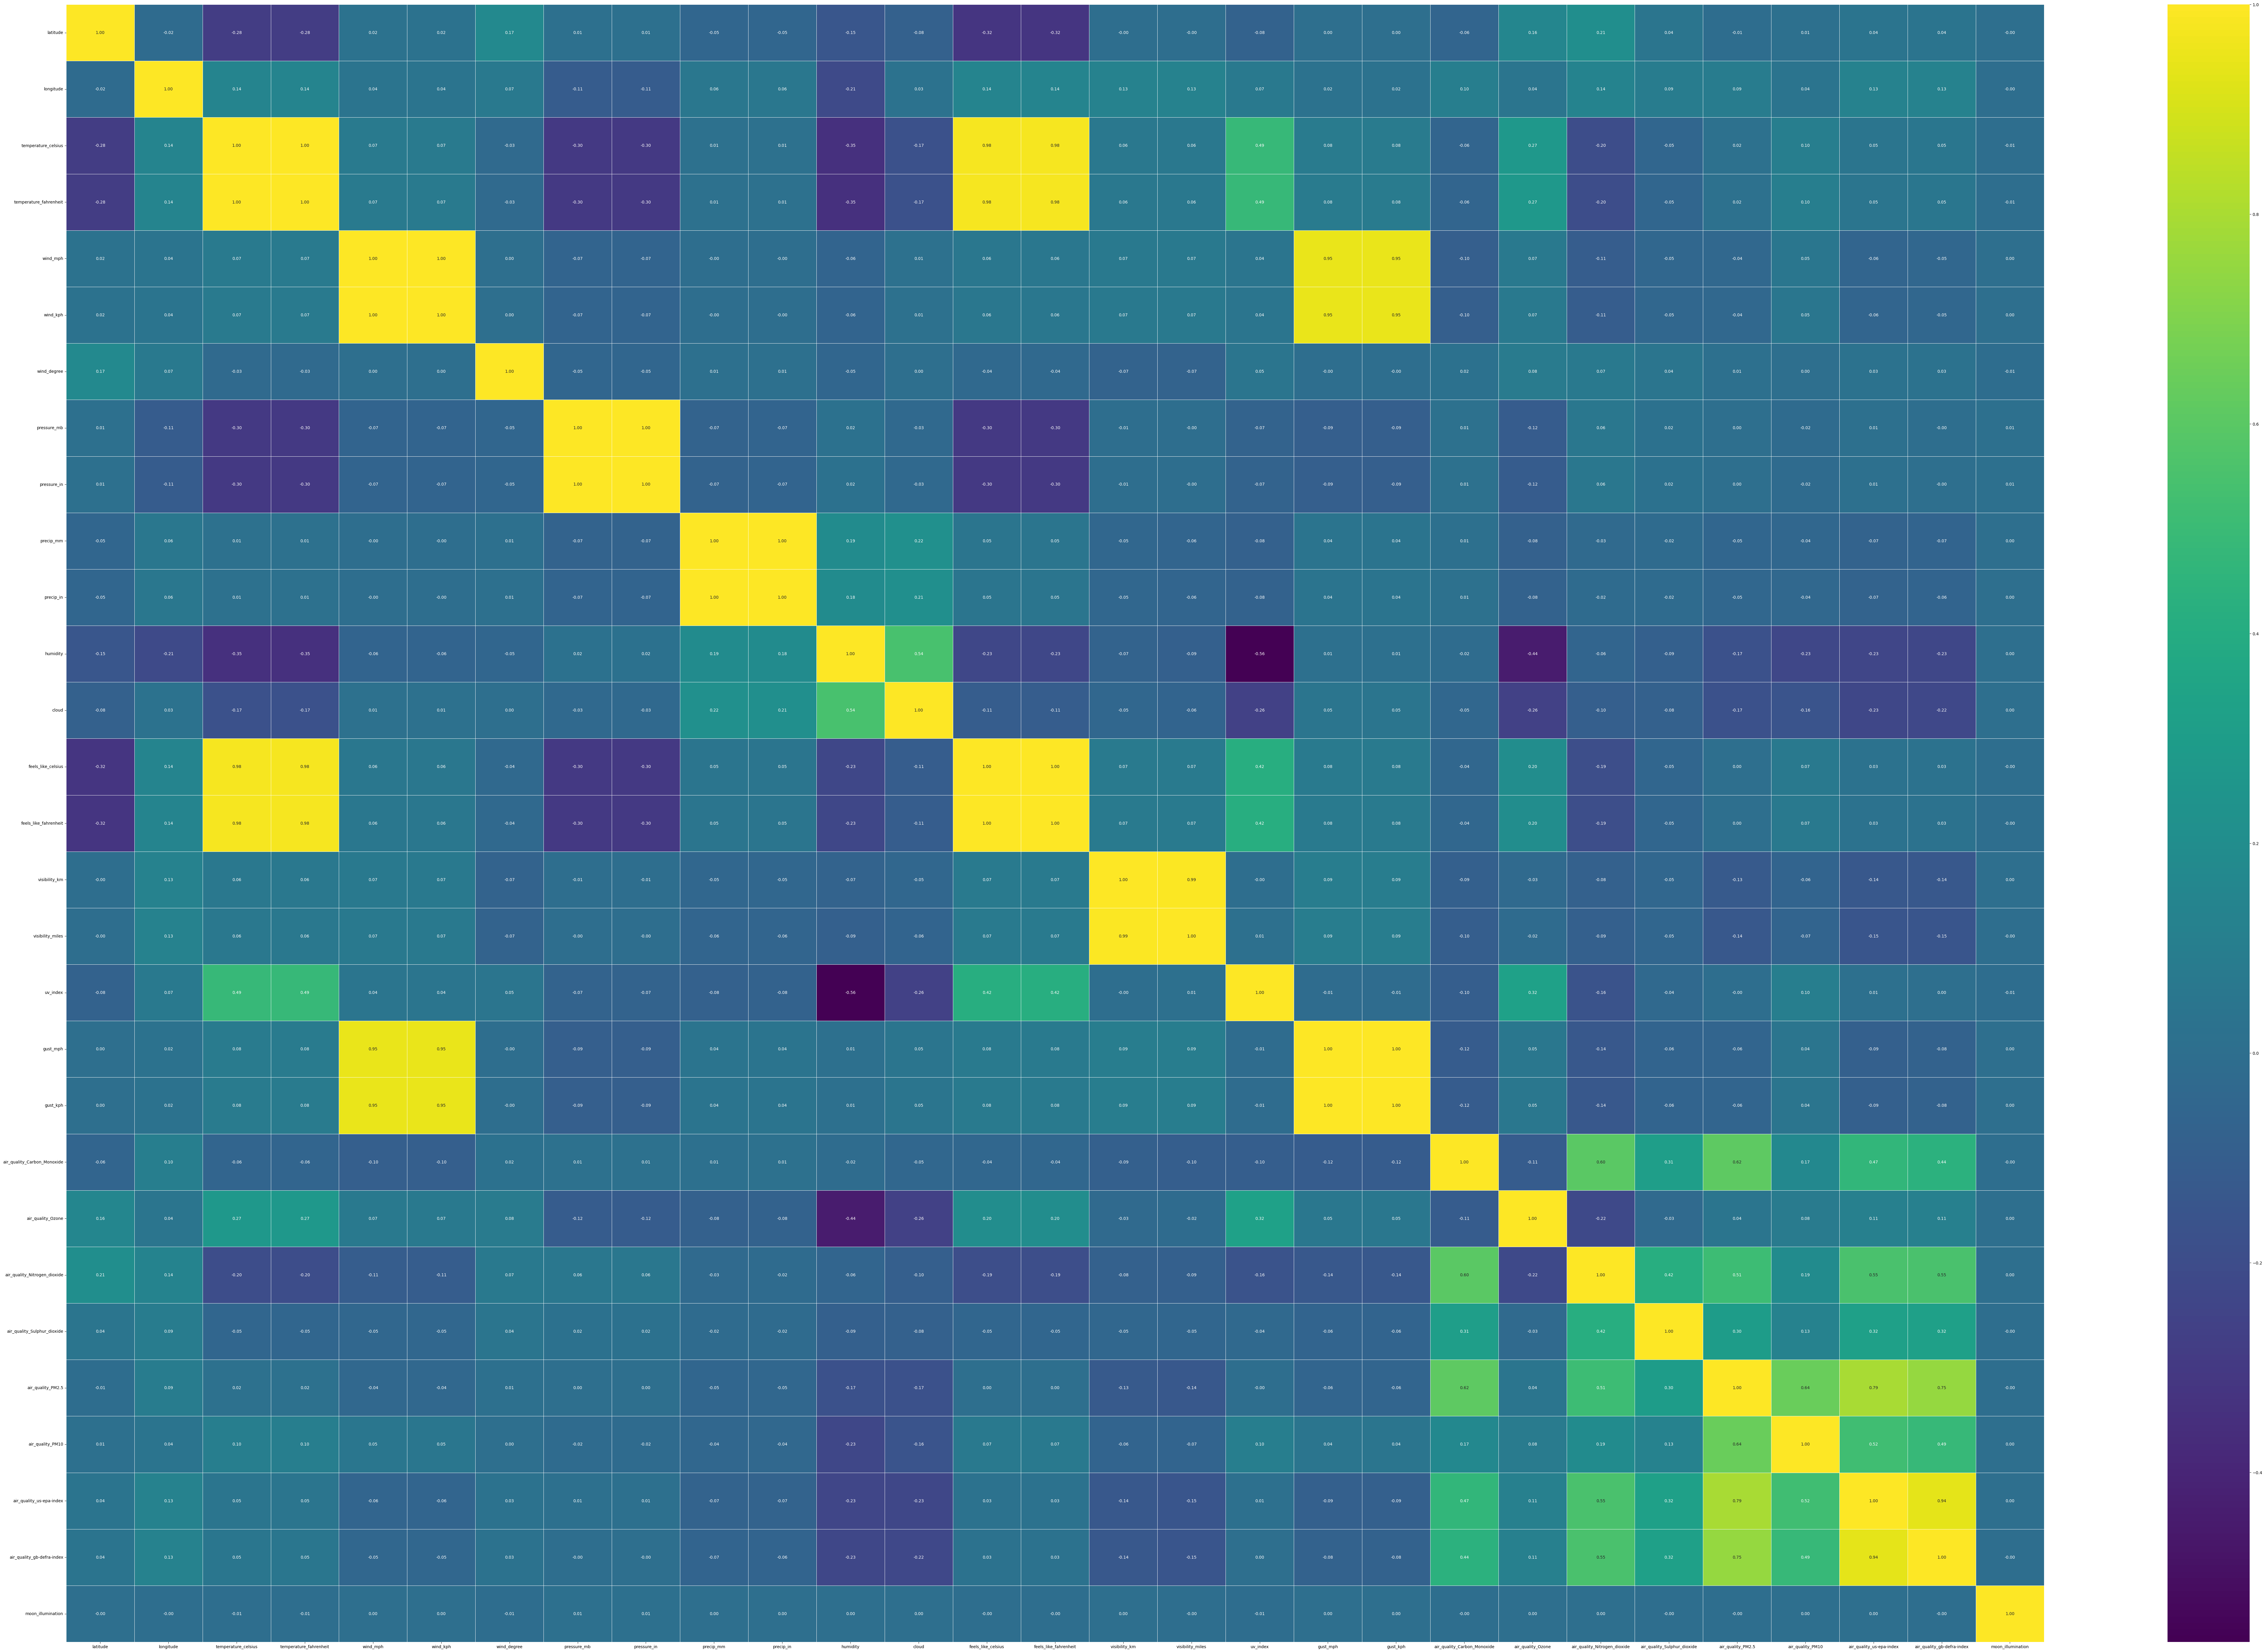

In [ ]:
#Shows the relationship with each column to another via R values.
plt.figure(figsize=(108,72))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths = 0.55, fmt=".2f")
plt.rcParams.update({'font.size': 50})
plt.show()

In [ ]:
# Convert last_updated to datetime and sort
df['last_updated'] = pd.to_datetime(df['last_updated'])
df.sort_values('last_updated', inplace=True)

In [ ]:
numeric_df['feels_like_celsius'].describe() #targets feels like temperature

,feels_like_celsius
count,88273.000000
mean,23.689406
std,10.817266
min,-35.600000
25%,18.000000
50%,26.000000
75%,30.900000
max,51.200000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Features and target
X = df[['temperature_celsius']]
y = df['feels_like_celsius']

# Train/test split based on time (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# =======================
# Step 3 – Train Model
# =======================
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# =======================
# Step 4 – Evaluation Metrics
# =======================
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.927438278351373
MAE: 1.6517655018025446
RMSE: 2.281868867241266


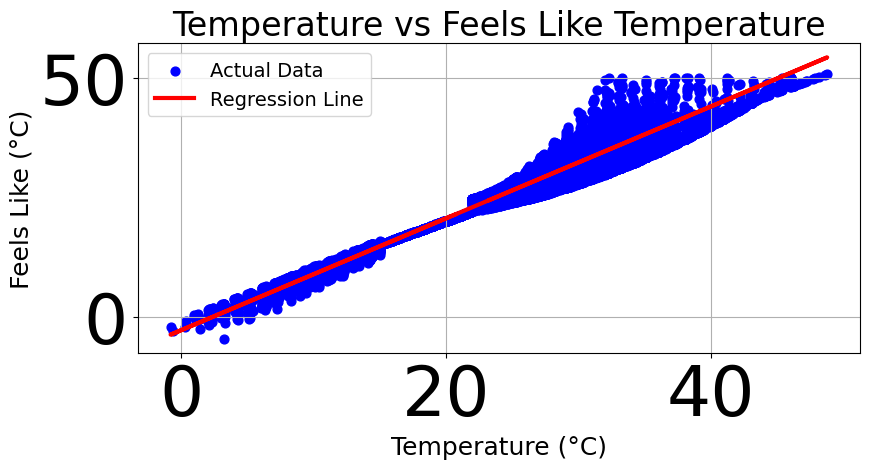

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(X_test, y_test, color='blue', s=40, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')
plt.title("Temperature vs Feels Like Temperature", fontsize=24)
plt.xlabel("Temperature (°C)", fontsize=18)
plt.ylabel("Feels Like (°C)", fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


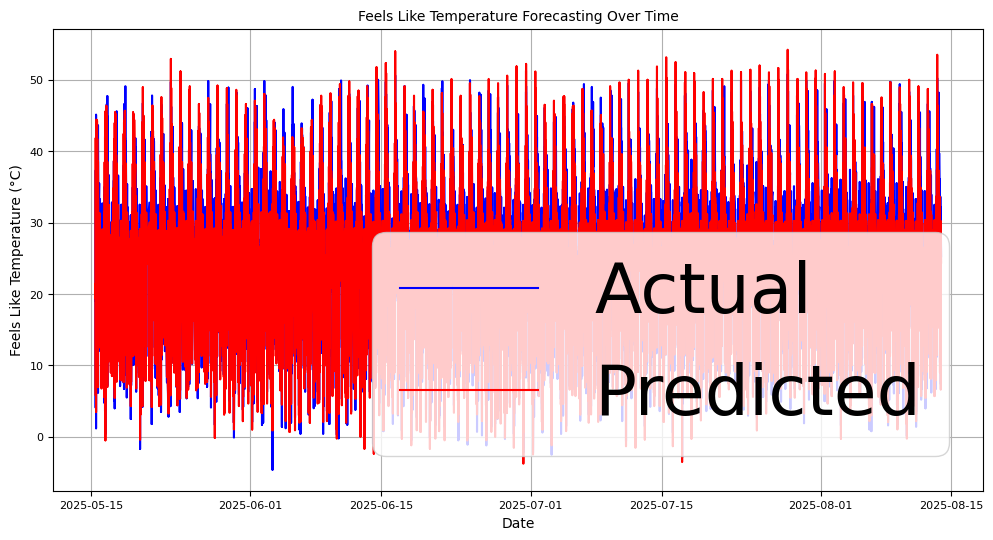

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(df['last_updated'].iloc[train_size:], y_test, label='Actual', color='blue')
plt.plot(df['last_updated'].iloc[train_size:], y_pred, label='Predicted', color='red')
plt.title("Feels Like Temperature Forecasting Over Time", fontsize=10)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Feels Like Temperature (°C)", fontsize=10)
plt.legend()
plt.grid(True)

# Reduce tick label size
plt.tick_params(axis='both', which='major', labelsize=8)

plt.show()
